# Compressible Boundary layer

## Equations

The compressible equations are given by:
$$
\begin{align}
 (Cf^{''})^{'} + ff^{''} &=0 \\
\left(\frac{C}{Pr}g_e^{'}\right)^{'} + fg_e^{'} + C\frac{u_e}{h_e}\left(f^{''}\right)^2 &=0
\end{align}
$$
With the boundary conditions:
$$f(0)=0,\quad f^{'}(0)=0,\quad g_e(0)=g_{e-w}$$

## Derivation ODE

Define the following variables:
$$
\begin{align}
A &= Cf^{''} \\
g &= f^{'}  \\
h &= g^{'}  \\
N &= \frac{C}{Pr}g_e^{'}
\end{align}
$$

Pluggin into original equations gives:
$$
\begin{align}
A' + fh &= 0 \\
f' &= g \\
g' &= h \\
N^{'} + f\frac{Pr}{C}N + C \frac{u_e}{h_e}h^2 &= 0
\end{align}
$$


This gives the following ODEs to be solved

$$
\begin{align}
A' &= - fh  \\
f' &= g \\
g' &= h \\
N^{'} &= - f\frac{Pr(g_e)}{C(g_e)}N - C \frac{u_e}{h_e}h^2 \\
g_e^{'} &= \frac{Pr(g_e)}{C(g_e)}N \\
\end{align} 
$$

With:
$$
\begin{align}
Pr(g_e) &= \frac{\mu(g_e) c_p(g_e)} {k(g_e)} \\
C(g_e) &=\frac{\rho(g_e) \mu(g_e)}{\rho_e\rho_e}
\end{align} 
$$

## Numerical Method

$$
\begin{align}
A(x+\Delta x) &= A(x)& -& f(x)h(x)\Delta x \\
f(x+\Delta x) &= f(x)& +&g(x)\Delta x      \\
g(x+\Delta x) &= g(x)& +&h(x)\Delta x      \\
N(x+\Delta x) &= N(x)& +&\left(- f(x)\frac{Pr(g_e)}{C(g_e)}N(x) - C(g_e) \frac{u_e}{h_e}h(x)^2\right)\Delta x \\
g_e(x+\Delta x) &= g_e(x)& +&\left(\frac{Pr(g_e)}{C(g_e)}N(x)\right)\Delta x \\
\end{align} 
$$

In [165]:
import numpy as np
n=1000
x = np.linspace(0,10,n)
dx = np.diff(x)
A = np.zeros(n)
f = np.zeros(n)
g = np.zeros(n)
h = np.ones(n)*0.1
ge = np.zeros(n)
N = np.ones(n)


In [166]:
import CoolProp as CP

def Pr(ge):
    return .1
def C(ge):
    return 1


In [171]:
niter=0
f[0]=0
g[0]=0
ge[0]=0
while niter < 10:
    h[0]=.1
    N[0]=.1
    for i in range(0,n-1):
        ip=i+1
        A[ip]=-f[i]*h[i]*dx[i] + A[i]
        f[ip]=g[i]*dx[i] + f[i]
        g[ip]=h[i]*dx[i] + g[i]
        N[ip]=(-f[i]*Pr(ge[i])/C(ge[i])*N[i]-C(ge[i])*1*h[i]**2)*dx[i]+N[i]
        ge[ip]=Pr(ge[i])/C(ge[i])*N[i]*dx[i]+ge[i]
        
    niter+=1
        

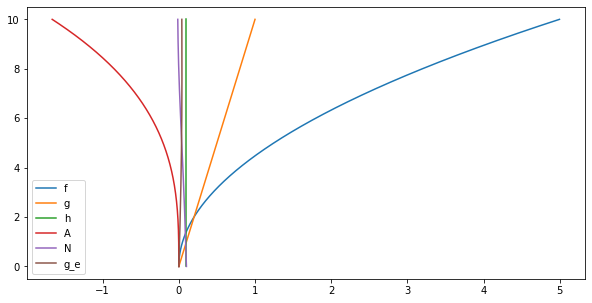

In [174]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(f, x,label='f')
ax.plot(g, x,label='g')
ax.plot(h, x,label='h')
ax.plot(A, x,label='A')
ax.plot(N, x,label='N')
ax.plot(ge,x,label='g_e')
ax.legend()
ax.

In [173]:
## Store
df = pd.DataFrame(np.array([f,g,h,A,N,ge]).T,columns=['f','g','h','A','N','ge']
df.to_csv()